# Compute econ metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
# import geoplot
import pickle
# import geoplot.crs as gcrs
import statsmodels.api as sm

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
edge_degree_df = pd.read_pickle("../../data_process/edge_degree_entropy_df.pickle")

In [3]:
node_degree_df = pd.read_pickle("../../data_process/node_degree_entropy_df.pickle")

In [4]:
node_df = pd.read_pickle('../../data_process/node_specific_df.pickle')

In [5]:
edge_df = pd.read_pickle('../../data_process/edge_specific_df.pickle')

In [27]:
node_degree_df.sort_values("poi_count")

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,...,sum_stay_duration_destination_entropy,total_stays_destination_entropy,num_nodes,num_1degree,num_2degree,num_3degree,num_4degree,num_greater5degree,poi_count,poi_count_entropy
73,403041075,41075,Clarendon,40304,Onkaparinga,403,Adelaide - South,4GADE,Greater Adelaide,4,...,1.774292,2.682742,964,282,273,377,31,1,20,2.246799
32,402021033,41033,One Tree Hill,40202,Playford,402,Adelaide - North,4GADE,Greater Adelaide,4,...,1.558105,2.263241,1237,472,143,588,34,0,31,1.134027
26,402011027,41027,Lewiston - Two Wells,40201,Gawler - Two Wells,402,Adelaide - North,4GADE,Greater Adelaide,4,...,0.818797,1.538956,659,210,60,360,29,0,42,2.200560
98,404031105,41105,Fulham,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,1.975506,2.784143,157,28,19,90,20,0,44,2.139979
84,403041088,41088,Willunga,40304,Onkaparinga,403,Adelaide - South,4GADE,Greater Adelaide,4,...,1.291381,2.203164,569,196,151,202,20,0,59,2.237452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,404011096,41096,West Lakes,40401,Charles Sturt,404,Adelaide - West,4GADE,Greater Adelaide,4,...,1.561317,2.681474,773,247,46,431,49,0,530,2.487498
96,404021101,41101,Port Adelaide,40402,Port Adelaide - West,404,Adelaide - West,4GADE,Greater Adelaide,4,...,2.340080,3.355081,965,175,124,482,177,7,583,2.968548
5,401021006,41006,Lobethal - Woodside,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,1.173523,2.038656,2074,699,282,1028,64,1,696,1.221761
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,3.152188,3.975034,517,149,54,239,69,6,759,2.249117


In [6]:
edge_df

,timestamp,destination,state,origin,unique_agents,sum_stay_duration,total_stays,OD,class_ART,class_BUS,...,class_UND,num_jobs_000_persons_origin,sa2_code16_x,median_income_per_job_aud_origin,num_jobs_000_persons_destination,sa2_code16_y,median_income_per_job_aud_destination,od_duration_value,od_distance_value,road_counts
0,2018-02-01T00:00:00.000+11:00,401011001,4,401011001,19863,268779414,681217,401011001401011001,208.0,13.0,...,10.0,14.057,401011001,17265.0,14.057,401011001,17265.0,1.0,1.0,2227.0
1,2018-02-01T00:00:00.000+11:00,401011002,4,401011001,6911,4857456,29322,401011001401011002,267.0,16.0,...,11.0,14.057,401011001,17265.0,5.459,401011002,24773.0,565.0,2897.0,2867.0
2,2018-02-01T00:00:00.000+11:00,401021003,4,401011001,404,253764,1334,401011001401021003,838.0,82.0,...,14.0,14.057,401011001,17265.0,5.373,401021003,24830.0,3293.0,39614.0,10415.0
3,2018-02-01T00:00:00.000+11:00,401021004,4,401011001,1184,903377,5487,401011001401021004,430.0,13.0,...,33.0,14.057,401011001,17265.0,14.156,401021004,28246.0,1603.0,20319.0,6590.0
4,2018-02-01T00:00:00.000+11:00,401021005,4,401011001,700,189721,1278,401011001401021005,517.0,13.0,...,33.0,14.057,401011001,17265.0,3.395,401021005,25031.0,2156.0,34698.0,7684.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,2018-02-01T00:00:00.000+11:00,404031105,4,404031109,2304,5876916,12172,404031109404031105,59.0,1.0,...,1.0,3.909,404031109,28657.0,1.867,404031105,26115.0,345.0,3289.0,520.0
10669,2018-02-01T00:00:00.000+11:00,404031106,4,404031109,2967,5413932,16935,404031109404031106,105.0,1.0,...,1.0,3.909,404031109,28657.0,9.750,404031106,25913.0,528.0,5066.0,1025.0
10670,2018-02-01T00:00:00.000+11:00,404031107,4,404031109,1811,937583,8366,404031109404031107,262.0,1.0,...,18.0,3.909,404031109,28657.0,18.962,404031107,23052.0,572.0,6601.0,1992.0
10671,2018-02-01T00:00:00.000+11:00,404031108,4,404031109,2464,1334692,11329,404031109404031108,182.0,1.0,...,21.0,3.909,404031109,28657.0,13.439,404031108,23003.0,695.0,6931.0,1849.0


In [7]:
edge_degree_df.columns

Index(['timestamp', 'destination', 'state', 'origin', 'unique_agents',
       'sum_stay_duration', 'total_stays', 'OD', 'class_ART', 'class_BUS',
       'class_COLL', 'class_FREE', 'class_HWY', 'class_LOCL', 'class_SUBA',
       'class_TRK2', 'class_TRK4', 'class_UND', 'num_jobs_000_persons_origin',
       'sa2_code16_x', 'median_income_per_job_aud_origin',
       'num_jobs_000_persons_destination', 'sa2_code16_y',
       'median_income_per_job_aud_destination', 'od_duration_value',
       'od_distance_value', 'road_counts', 'num_nodes_x', 'num_1degree_x',
       'num_2degree_x', 'num_3degree_x', 'num_4degree_x',
       'num_greater5degree_x', 'num_nodes_y', 'num_1degree_y', 'num_2degree_y',
       'num_3degree_y', 'num_4degree_y', 'num_greater5degree_y',
       'num_1degree_pth', 'num_2degree_pth', 'num_3degree_pth',
       'num_4degree_pth', 'num_greater5degree_pth', 'num_nodes_pth',
       'poi_entropy_x', 'poi_entropy_y', 'poi_count_x', 'poi_count_y'],
      dtype='object')

In [8]:
node_degree_df

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,...,sum_stay_duration_destination_entropy,total_stays_destination_entropy,num_nodes,num_1degree,num_2degree,num_3degree,num_4degree,num_greater5degree,poi_count,poi_count_entropy
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,3.949646,4.237396,1642,291,199,865,276,11,3288,2.484423
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,3.152188,3.975034,517,149,54,239,69,6,759,2.249117
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,0.948900,2.042530,4034,1174,731,1982,141,6,109,2.247960
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,1.099284,2.075796,2455,710,502,1126,110,7,377,2.736525
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,1.654530,2.549629,989,286,245,421,36,1,97,2.443896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,404031105,41105,Fulham,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,1.975506,2.784143,157,28,19,90,20,0,44,2.139979
99,404031106,41106,Lockleys,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,1.416921,2.608267,530,102,39,308,81,0,129,1.991836
100,404031107,41107,Plympton,40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,1.695853,2.732940,1036,170,105,616,143,2,353,2.013120
101,404031108,41108,Richmond (SA),40403,West Torrens,404,Adelaide - West,4GADE,Greater Adelaide,4,...,2.308701,3.390496,887,125,120,410,231,1,334,2.342724


In [9]:
# drop the self loops (accessibility does not consider the intra-zonal flows)
edge_degree_df_no_self_loops = edge_degree_df.loc[edge_degree_df.origin != edge_degree_df.destination, :]

In [10]:
edge_degree_df_no_self_loops.shape

(10137, 49)

## Econ opportunity visualization

In [13]:
# get from the regression results.
attraction_parameter = 0.691 # destination coefficient
time_parameter = -2.135 # travel time friction 

In [14]:
# compute the metric
metric_list = []

for origin_idx in node_degree_df.SA2_MAIN16:
    edge_df_specific_origin = edge_degree_df_no_self_loops.loc[edge_degree_df_no_self_loops['origin']==origin_idx, :]
    # formula for econ opportunities
    metric=np.sum(edge_df_specific_origin['num_jobs_000_persons_destination']**attraction_parameter / edge_df_specific_origin['od_duration_value']**np.abs(time_parameter))
    metric_list.append(metric)

metric_df = pd.DataFrame({"sa2":node_degree_df.SA2_MAIN16, "econ_metric_employment_opportunity":metric_list}) 
node_df_visual = node_df.merge(metric_df, left_on='SA2_MAIN16', right_on='sa2')


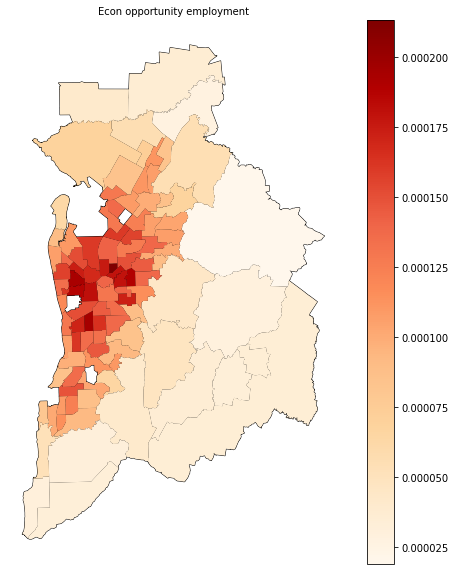

In [15]:
# sw: something is wrong with the southeastern area.
# See the central areas are advantaged by economic opportunities.
fig, ax = plt.subplots(figsize = (10,10))
node_df_visual.plot(facecolor='w', edgecolor='k', ax = ax)
node_df_visual.plot(column = 'econ_metric_employment_opportunity', cmap='OrRd', legend=True, ax = ax)
ax.set_title("Econ opportunity employment", fontsize=10)
ax.set_axis_off()

Text(0, 0.5, 'employment opportunities')

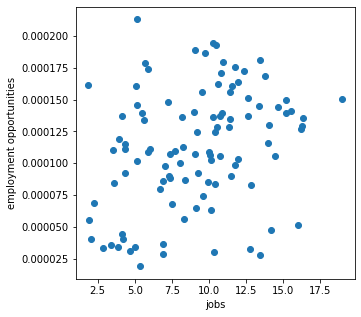

In [16]:
# econ opportunity vs. employment
plt.figure(figsize=(5,5))
plt.scatter(node_df_visual.num_jobs_000_persons, node_df_visual.econ_metric_employment_opportunity)
plt.xlabel('jobs')
plt.ylabel('employment opportunities')

## Activity opportunity metrics

In [23]:
# compute the metric
metric_list = []

for origin_idx in node_degree_df.SA2_MAIN16:
    edge_df_specific_origin = edge_degree_df_no_self_loops.loc[edge_degree_df_no_self_loops['origin']==origin_idx, :]
    # formula for econ opportunities
    metric=np.sum(edge_df_specific_origin['poi_count_y']**attraction_parameter / edge_df_specific_origin['od_duration_value']**np.abs(time_parameter))
    metric_list.append(metric)

metric_df = pd.DataFrame({"sa2":node_degree_df.SA2_MAIN16, "econ_activity_opportunity":metric_list})
node_degree_df_visual = node_degree_df.merge(metric_df, left_on='SA2_MAIN16', right_on='sa2')


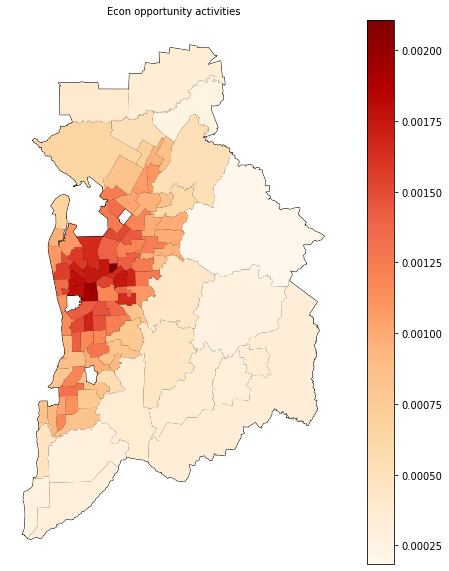

In [24]:
# 
fig, ax = plt.subplots(figsize = (10,10))
node_degree_df_visual.plot(facecolor='w', edgecolor='k', ax = ax)
node_degree_df_visual.plot(column = 'econ_activity_opportunity', cmap='OrRd', legend=True, ax = ax)
ax.set_title("Econ opportunity activities", fontsize=10)
ax.set_axis_off()

Text(0, 0.5, 'activity opportunities')

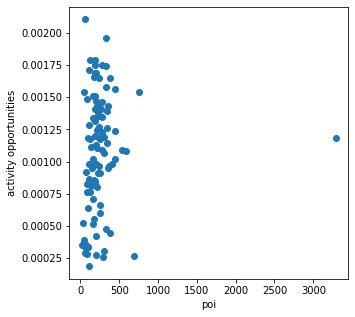

In [28]:
# econ opportunity vs. pois
plt.figure(figsize=(5,5))
plt.scatter(node_degree_df_visual.poi_count, node_degree_df_visual.econ_activity_opportunity)
plt.xlabel('poi')
plt.ylabel('activity opportunities')

#sw: the outlier is the center Adelaide area

In [ ]:
# compute the metric
metric_list = []

for origin_idx in node_degree_df.SA2_MAIN16:
    edge_df_specific_origin = edge_degree_df_no_self_loops.loc[edge_degree_df_no_self_loops['origin']==origin_idx, :]
    # formula for econ opportunities
    metric=np.sum(edge_df_specific_origin['poi_count_x']**attraction_parameter / edge_df_specific_origin['od_duration_value']**np.abs(time_parameter))
    metric_list.append(metric)

metric_df = pd.DataFrame({"sa2":node_degree_df.SA2_MAIN16, "econ_metric_employment_opportunity":metric_list}) 
node_df_visual = node_df.merge(metric_df, left_on='SA2_MAIN16', right_on='sa2')
